In [1]:
push!(LOAD_PATH, pwd())

using PyPlot, Statistics, CPUTime
using SpinBodies, MBTrees;

In [10]:
const maxsteps = 1000000
const N        = 50
const T_step   = 0.1
const Ts       = T_step:T_step:4;

In [11]:
freeman_data      = Vector{Float64}(undef, length(Ts))
freeman_fast_data = Vector{Float64}(undef, length(Ts))
metropolis_data   = Vector{Float64}(undef, length(Ts));

# Freeman Data

In [12]:
for (i, T) in enumerate(Ts)
    lattice = SpinLattice(N, T)
    tree = build_tree(lattice)
    times = Vector{Float64}(undef, 20)
    for j = 1:20
        time = @CPUelapsed while lattice.steps < maxsteps
            freeman_step!(lattice, tree)
        end
        times[j] = time
    end
    freeman_data[i] = mean(times)
    if i % 5 == 0
        println("T = $T")
    end 
end

T = 0.5
T = 1.0
T = 1.5
T = 2.0
T = 2.5
T = 3.0
T = 3.5
T = 4.0


# Freeman (Fast) Data

In [13]:
for (i, T) in enumerate(Ts)
    lattice = SpinLattice(N, T)
    tree = build_tree(lattice)
    times = Vector{Float64}(undef, 20)
    for j = 1:20
        time = @CPUelapsed while lattice.steps < maxsteps
            freeman_step!(lattice, tree, fast=true)
        end
        times[j] = time
    end
    freeman_fast_data[i] = mean(times)
    if i % 5 == 0
        println("T = $T")
    end 
end

T = 0.5
T = 1.0
T = 1.5
T = 2.0
T = 2.5
T = 3.0
T = 3.5
T = 4.0


# Metropolis Data

In [14]:
for (i, T) in enumerate(Ts)
    lattice = SpinLattice(N, T)
    times = Vector{Float64}(undef, 20)
    for j = 1:20
        time = @CPUelapsed while lattice.steps < maxsteps
            metropolis_step!(lattice)
        end
        times[j] = time
    end
    metropolis_data[i] = mean(times)
    if i % 5 == 0
        println("T = $T")
    end 
end

T = 0.5
T = 1.0
T = 1.5
T = 2.0
T = 2.5
T = 3.0
T = 3.5
T = 4.0


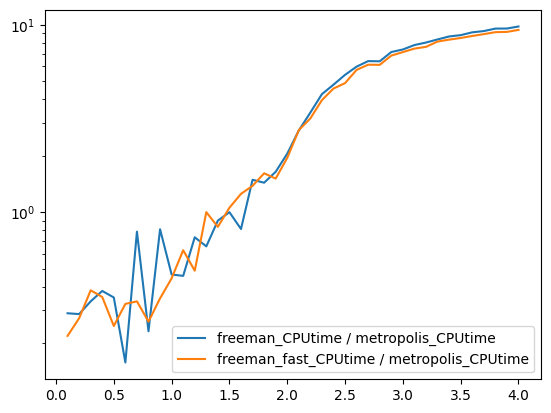

PyObject <matplotlib.legend.Legend object at 0x7fd815812160>

In [15]:
semilogy(Ts, freeman_data ./ metropolis_data) # / freeman_data[end] * metropolis_data[end])
semilogy(Ts, freeman_fast_data ./ metropolis_data) # / freeman_fast_data[end] * metropolis_data[end])
legend(["freeman_CPUtime / metropolis_CPUtime", "freeman_fast_CPUtime / metropolis_CPUtime"])
# savefig("freeman_CPUtime_per_metropolis_CPUtime.pdf")